In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

############ loading train and test datasets ##############
df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


numerical_features = [ f for f in train_data.columns if train_data[f].isnull().sum() >= 1 and train_data[f].dtypes != 'O'] 

for i in numerical_features:
    median_val = train_data[i].median()
    train_data[i].fillna(median_val,inplace = True)
    

categorical_features = [ f for f in train_data.columns if train_data[f].isnull().sum() >= 1 and train_data[f].dtypes == 'O']

for i in categorical_features:
    train_data[i] = train_data[i].fillna('missing')
    
    
Yr_features = [features for features in train_data.columns if 'Yr' in features or 'Year' in features]
print('number of Temporal Variables:', len(Yr_features))
train_data[Yr_features].head()

for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train_data[i] = train_data['YrSold'] - train_data[i]
    
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train_data[feature]=np.log(train_data[feature])

number of Temporal Variables: 4


In [2]:
categorical_features = [ f for f in train_data.columns if train_data[f].dtypes == 'O']

In [3]:
len(categorical_features)

43

In [4]:
train_data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1,RL,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
2,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
3,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
4,RL,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal


In [40]:
from sklearn.preprocessing import LabelEncoder


In [33]:
numerical_features1 = [ f for f in train_data.columns if train_data[f].dtypes != 'O']
data_final = pd.concat(
            [pd.DataFrame(train_data[categorical_features],columns = categorical_features).apply(LabelEncoder().fit_transform),
                      pd.DataFrame(train_data[numerical_features1] ,columns = numerical_features1)], axis=1)

In [49]:
scaling_feature=[feature for feature in data_final.columns if feature not in ['Id','SalePrice'] ]
len(scaling_feature)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_final[scaling_feature])

scaler.transform(data_final[scaling_feature])

data_train = pd.concat([data_final[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data_final[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [50]:
data_train.head()

,Id,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,12.247694,0.75,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,2,12.109011,0.75,1.0,1.0,1.0,1.0,0.0,0.5,0.0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,3,12.317167,0.75,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,4,11.849398,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,5,12.429216,0.75,1.0,1.0,0.0,1.0,0.0,0.5,0.0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [52]:
X = data_train.drop(['Id','SalePrice'],axis =1)
y = data_train['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)

print("test data Score:", rf.score(X_test,y_test))
print("train data Score:" , rf.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, rf_y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred)))

test data Score: 0.8876906361730181
train data Score: 0.9796686558019055
r2 sqyuare value 0.8876906361730181
MAE: 0.09444212070964726
MSE: 0.01905285286614148
RMSE: 0.13803207187513153


In [53]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10,50,100,200,500,800]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,30,50,80]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]




# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 50, 80, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         800]},
                   random_state=42, verbose=2)

In [54]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [55]:
rf_best = RandomForestRegressor(n_estimators =  800,
 min_samples_split =  2,
 min_samples_leaf =  1,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = False)

rf_best.fit(X_train,y_train)
rf_y_pred_best = rf_best.predict(X_test)

print("test data Score:", rf_best.score(X_test,y_test))
print("train data Score:" , rf_best.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, rf_y_pred_best)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_y_pred_best))
print('MSE:', metrics.mean_squared_error(y_test, rf_y_pred_best))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred_best)))

test data Score: 0.8847077144423546
train data Score: 1.0
r2 sqyuare value 0.8847077144423546
MAE: 0.0910714615864399
MSE: 0.019558894098225237
RMSE: 0.1398531161548617


In [56]:
X_train.shape

(1022, 79)

In [72]:
numerical_features = [ f for f in test_data.columns if test_data[f].isnull().sum() >= 1 and test_data[f].dtypes != 'O'] 

for i in numerical_features:
    median_val = test_data[i].median()
    test_data[i].fillna(median_val,inplace = True)
    

categorical_features = [ f for f in test_data.columns if test_data[f].isnull().sum() >= 1 and test_data[f].dtypes == 'O']

for i in categorical_features:
    test_data[i] = test_data[i].fillna('missing')
    
    
Yr_features = [features for features in test_data.columns if 'Yr' in features or 'Year' in features]
print('number of Temporal Variables:', len(Yr_features))
test_data[Yr_features].head()

for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    test_data[i] = test_data['YrSold'] - test_data[i]
    
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea' ]

for feature in num_features:
    test_data[feature]=np.log(test_data[feature])
	


number of Temporal Variables: 4


In [73]:
categorical_features1 = [ f for f in test_data.columns if test_data[f].dtypes == 'O']

In [74]:
test_data[categorical_features1]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,missing,MnPrv,missing,WD,Normal
1,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,missing,missing,Gar2,WD,Normal
2,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,missing,MnPrv,missing,WD,Normal
3,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,missing,missing,missing,WD,Normal
4,RL,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,missing,missing,missing,missing,Y,missing,missing,missing,WD,Normal
1455,RM,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
1456,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
1457,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,missing,missing,missing,missing,Y,missing,MnPrv,Shed,WD,Normal


In [75]:
from sklearn.preprocessing import LabelEncoder

numerical_features1 = [ f for f in test_data.columns if test_data[f].dtypes != 'O']
data_final_test = pd.concat([pd.DataFrame(test_data[categorical_features],columns = categorical_features1).apply(LabelEncoder().fit_transform),
                      pd.DataFrame(test_data[numerical_features1] ,columns = numerical_features1)] , axis=1)

In [78]:
data_final_test = data_final_test.drop(['Id'],axis=1)

In [79]:
data_final_test.shape

(1459, 79)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_final_test)
scaler.transform(data_final_test)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.45454545,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.73529412, 0.45454545,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18181818,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.72727273,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04117647, 0.54545455,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.90909091,
        0.        ]])

In [81]:
scaling_feature=[feature for feature in data_final_test.columns ]

In [82]:
len(scaling_feature)

79

In [83]:
data_test_scaled = pd.DataFrame(scaler.transform(data_final_test) , columns = scaling_feature )

In [84]:
data_test_scaled.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0


In [85]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
135,0.75,1.0,1.0,1.000000,1.0,0.0,1.00,0.0,0.583333,0.25,...,0.373766,0.114352,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.50
1452,1.00,1.0,1.0,1.000000,1.0,0.0,1.00,0.0,0.291667,0.25,...,0.370240,0.000000,0.051188,0.0,0.0,0.0,0.0,0.0,0.363636,0.00
762,0.25,1.0,1.0,1.000000,1.0,0.0,1.00,0.0,0.875000,0.25,...,0.433004,0.197200,0.082267,0.0,0.0,0.0,0.0,0.0,0.454545,1.00
932,0.75,1.0,1.0,0.000000,1.0,0.0,0.00,0.0,0.875000,1.00,...,0.555712,0.000000,0.349177,0.0,0.0,0.0,0.0,0.0,0.181818,0.25
435,0.75,1.0,1.0,0.333333,1.0,0.0,0.25,0.0,0.208333,0.50,...,0.387870,0.184364,0.111517,0.0,0.0,0.0,0.0,0.0,0.272727,0.75


In [86]:
data_op_test = rf_best.predict(data_test_scaled)

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

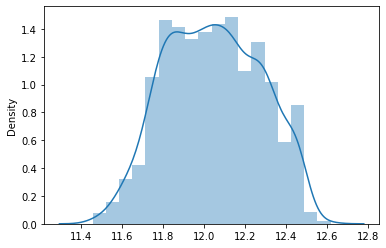

In [89]:
sns.distplot(data_op_test)

In [90]:
data_op_test

array([11.81902847, 12.03355283, 12.14094279, ..., 12.08717063,
       11.71579357, 12.29280412])

In [98]:
sample_data = pd.DataFrame(np.exp(data_op_test),columns = ['SalePrice_Testdata'])

In [99]:
sample_data.head()

,SalePrice_Testdata
0,135812.219400
1,168308.322983
2,187389.158320
3,185322.469934
4,168955.605405


In [109]:
sample_data = pd.DataFrame({'Id': test_data['Id'],'SalePrice_Testdata':np.exp(data_op_test)})

In [110]:
sample_data.head()

,Id,SalePrice_Testdata
0,1461,135812.219400
1,1462,168308.322983
2,1463,187389.158320
3,1464,185322.469934
4,1465,168955.605405


In [111]:
df.shape

(1459, 2)

In [112]:
sample_data.shape

(1459, 2)